# Portfolio Optimization 

When we take a look at the past chapters, we learned:

* fundamental asset classes of financial markets
* the concept of random variables
* how to estimate unknown parameters and the estimation uncertainty that comes along
* we estimated common descriptive statistics of time series data
* we learned about the principles of linear regression
* we introduced ourselves with time series analysis

In this chapter we take a look at portfolio optimization as a part of modern portfolio theory. To understand this, we use many aspects of previous chapters such as:

* Random variables
* Estimating the mean, variance and pairwise covariances between assets. This can be done or at least supported by:
    * unconditional estimates
    * regression based estimates
    * time-series estimates
* Solve an optimization task
* Handle estimation uncertainty

Furthermore, portfolio theory is great in builing fundamental knowledge about "natural laws" on financial markets such as the risk-return trade-off, about the challenges for real-life applications of such a theory and the potential inferences you can derive even for your personal life. 

**Modern portfolio** theory has been introduced by Harry Markowitz in 1952 who has been rewarded with a Nobel Memorial Price in Economics. Underlying assumptions of this theory are:

* Investors are risk averse
* Risk is assessed by volatility
* Given a return level, investors favor investments with lower variance

Let’s start formalizing things a bit. Assume we invest in a set of \( N \) risky assets.

Let:

- $\mu = (\mu_1, \mu_2, \dots, \mu_N)^\top $ be the vector of **expected returns**.
- $ \Sigma $ be the $ N \times N $ **covariance matrix** of asset returns.
- $ w = (w_1, w_2, \dots, w_N)^\top $ be the vector of **portfolio weights**, where $ \sum_{i=1}^N w_i = 1 $.

Then:

- The **expected portfolio return** is:
  $$
  \mathbb{E}[R_p] = w^\top \mu
  $$

- The **portfolio variance** is:
  $$
  \text{Var}(R_p) = w^\top \Sigma w
  $$

**Note:** Markowitz’s theory applies to any risky assets—not just stocks. While examples often focus on equities due to data availability and clarity of diversification effects, the framework is general and can include bonds, commodities, or any asset with estimable returns and risk. Many textbooks explain Markowitz's theory by using only stocks as risky assets. We use an example with different asset classes.

## Optimal Portfolios of Risky Assets

The first steps for understanding Markowitz's idea of modern portfolio theory are:

1. Combining assets with different weightings spans a universe of portfolios with different risk (measured by portfolio variance) and return (measured by the expected portfolio return) profiles
2. The range of different risk and return profiles is limited by dependencies that define the potential of diversification.
3. Only a few of the portfolios within the portfolio universe remain as investments for rationale investors (those on the efficient frontier)

For a better understanding of these steps, we use a fictional example of five risk assets:

| Asset       | Description       | Expected Return | Volatility |
|-------------|-------------------|------------------|------------|
| A           | Equity Index      | 8.00%           | 20%        |
| B           | Corporate Bond    | 4.00%           | 10%        |
| C           | Gold              | 5.00%           | 15%        |
| D           | Bitcoin           | 15.00%          | 50%        |
| E           | Oil               | 7.00%           | 30%        |


with covariance matrix:

|       | A       | B       | C       | D       | E       |
|-------|---------|---------|---------|---------|---------|
| A     | 0.0400  | 0.0100  | 0.0060  | 0.0250  | 0.0300  |
| B     | 0.0100  | 0.0100  | 0.0015  | 0.0050  | 0.0090  |
| C     | 0.0060  | 0.0015  | 0.0225  | 0.0150  | 0.0045  |
| D     | 0.0250  | 0.0050  | 0.0150  | 0.2500  | 0.0450  |
| E     | 0.0300  | 0.0090  | 0.0045  | 0.0450  | 0.0900  |

To better understand the dependencies between assets, it's often helpful to convert the **covariance matrix** into a **correlation matrix**. While covariance depends on the units and magnitudes of returns, correlation standardizes these relationships to a scale between $-1$ and $1$.

We compute the correlation matrix by:

$$
\rho_{ij} = \frac{\text{Cov}(R_i, R_j)}{\sigma_i \cdot \sigma_j}
$$

Or, in matrix form:

$$
\text{Corr} = \frac{\Sigma}{\sigma \cdot \sigma^\top}
$$

where $ \sigma $ is the vector of standard deviations. For this example, we have:


|       | A     | B     | C     | D     | E     |
|-------|-------|-------|-------|-------|-------|
| A     | 1.00  | 0.50  | 0.15  | 0.25  | 0.50  |
| B     | 0.50  | 1.00  | 0.10  | 0.10  | 0.30  |
| C     | 0.15  | 0.10  | 1.00  | 0.20  | 0.10  |
| D     | 0.25  | 0.10  | 0.20  | 1.00  | 0.30  |
| E     | 0.50  | 0.30  | 0.10  | 0.30  | 1.00  |

Thus, for a weighting vector of the individual assets, we use:

$$
\mu =
\begin{bmatrix}
0.08 \\
0.04 \\
0.05 \\
0.15 \\
0.07
\end{bmatrix}
$$

and

$$
\Sigma =
\begin{bmatrix}
0.0400 & 0.0100 & 0.0060 & 0.0250 & 0.0300 \\
0.0100 & 0.0100 & 0.0015 & 0.0050 & 0.0090 \\
0.0060 & 0.0015 & 0.0225 & 0.0150 & 0.0045 \\
0.0250 & 0.0050 & 0.0150 & 0.2500 & 0.0450 \\
0.0300 & 0.0090 & 0.0045 & 0.0450 & 0.0900
\end{bmatrix}
$$

Note that the covariance and correlation matrix, respectively, have a great impact on the diversification potential of the portfolios which can be created. **Diversification** refers to the practice of spreading investments across multiple assets to reduce the overall risk of a portfolio.

In the context of modern portfolio theory, diversification exploits the fact that asset returns are not perfectly correlated. When combining assets with less than perfect positive correlation, the overall **portfolio variance** can be reduced — often significantly — even if the individual assets are volatile.

This is captured mathematically by the portfolio variance:

$$
\text{Var}(R_p) = \sigma_{p}^2 = w^\top \Sigma w = \sum_{i = 1}^N w_i^2 \sigma_i^2 + \sum_{i = 1, i \neq j}^N \sum_{j = 1, i \neq j}^N w_i w_j \sigma_{ij}
$$

where $\sigma_i^2$ is the variance of asset $i$ and $\sigma_{ij}$ is the covariance between asset $i$ and asset $j$. Basically, the portfolio variance is a weighted sum of individual variances and covariances. For perfect correlation, covariances are the highest, thus, $\text{Var}(R_p)$ is higher than under scenarios without perfect (linear) dependence. The lower pairwise covariances are, the little gets added to the portfolio variance. 

Diversification does not eliminate risk completely — especially **systematic risk** (market-wide risk) — but it **minimizes unsystematic risk**, which is specific to individual assets.

In our example, diversification arises from:
- Combining equities with commodities (e.g. gold or oil), which tend to behave differently under inflationary or crisis scenarios.
- Adding high-volatility assets (like Bitcoin) with low correlations to traditional markets.
- Including moderately correlated assets like corporate bonds, which provide stability but also contribute to return.

In the cell below, we create 5,000 random portfolios by drawing random weights. The only conditions for these weights are:

* $w_i \geq 0$, long only investment, no short selling
* $\sum_i w_i = 1$, full investment

With every weight combination, we calculate the expected portfolio return and the portfolio volatility (squre root of its variance). The figure below plots volatility against the expected return for all portfolios. 

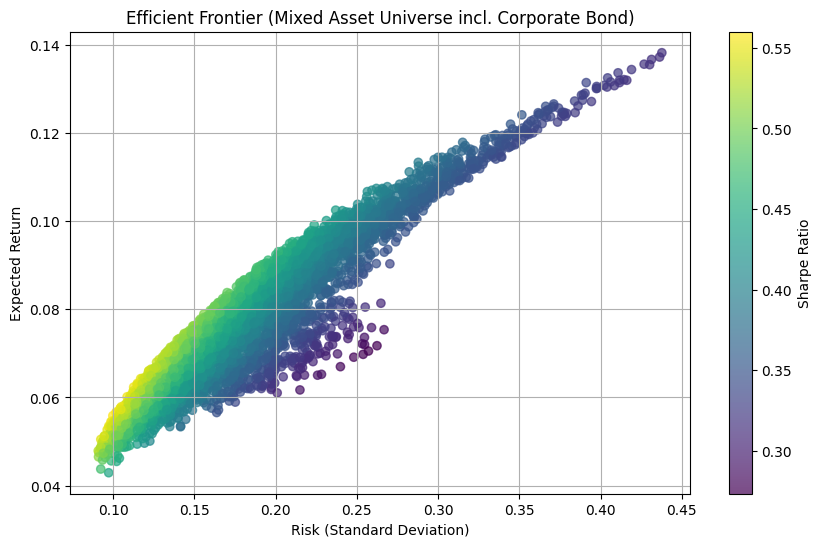

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Expected returns and volatilities
mu = np.array([0.08, 0.04, 0.05, 0.15, 0.07])
std_devs = np.array([0.20, 0.10, 0.15, 0.50, 0.30])

# Updated correlation matrix
correlations = np.array([
    [1.00, 0.50, 0.15, 0.25, 0.50],
    [0.50, 1.00, 0.10, 0.10, 0.30],
    [0.15, 0.10, 1.00, 0.20, 0.10],
    [0.25, 0.10, 0.20, 1.00, 0.30],
    [0.50, 0.30, 0.10, 0.30, 1.00]
])

# Convert to covariance matrix
cov = correlations * np.outer(std_devs, std_devs)

# Simulate long-only, fully-invested portfolios
num_portfolios = 5000
results = np.zeros((3, num_portfolios))  # return, risk, Sharpe
weights_list = []

for i in range(num_portfolios):
    weights = np.random.dirichlet(np.ones(len(mu)))
    weights_list.append(weights)

    port_return = np.dot(weights, mu)
    port_risk = np.sqrt(np.dot(weights.T, np.dot(cov, weights)))
    sharpe = port_return / port_risk

    results[0, i] = port_return
    results[1, i] = port_risk
    results[2, i] = sharpe

# Plot the efficient frontier
plt.figure(figsize=(10, 6))
plt.scatter(results[1], results[0], c=results[2], cmap='viridis', alpha=0.7)
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier (Mixed Asset Universe incl. Corporate Bond)')
plt.grid(True)
plt.show()

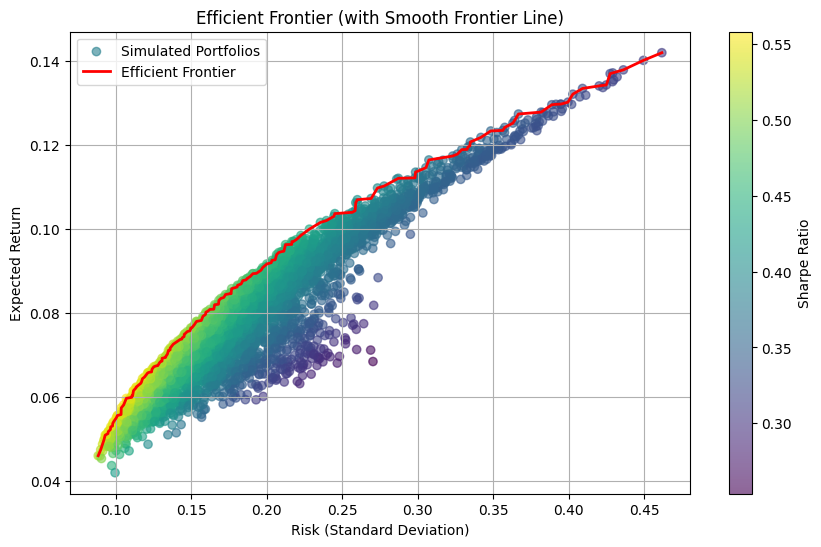

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Expected returns and volatilities
mu = np.array([0.08, 0.04, 0.05, 0.15, 0.07])
std_devs = np.array([0.20, 0.10, 0.15, 0.50, 0.30])

# Realistic correlation matrix
correlations = np.array([
    [1.00, 0.50, 0.15, 0.25, 0.50],
    [0.50, 1.00, 0.10, 0.10, 0.30],
    [0.15, 0.10, 1.00, 0.20, 0.10],
    [0.25, 0.10, 0.20, 1.00, 0.30],
    [0.50, 0.30, 0.10, 0.30, 1.00]
])

# Covariance matrix
cov = correlations * np.outer(std_devs, std_devs)

# Simulate long-only, fully-invested portfolios
num_portfolios = 5000
results = np.zeros((3, num_portfolios))  # return, risk, Sharpe
weights_list = []

for i in range(num_portfolios):
    weights = np.random.dirichlet(np.ones(len(mu)))
    weights_list.append(weights)

    port_return = np.dot(weights, mu)
    port_risk = np.sqrt(np.dot(weights.T, np.dot(cov, weights)))
    sharpe = port_return / port_risk

    results[0, i] = port_return
    results[1, i] = port_risk
    results[2, i] = sharpe

# Efficient frontier: for each return level, find minimum risk
df = np.vstack(results).T
df_sorted = df[df[:, 0].argsort()]  # sort by return
returns = df_sorted[:, 0]
risks = df_sorted[:, 1]

# Create frontier by filtering out portfolios not on the upper edge
frontier_returns = []
frontier_risks = []
min_risk_so_far = float('inf')
for r, s in zip(returns[::-1], risks[::-1]):
    if s < min_risk_so_far:
        frontier_returns.append(r)
        frontier_risks.append(s)
        min_risk_so_far = s

# Reverse to plot in ascending return order
frontier_returns = frontier_returns[::-1]
frontier_risks = frontier_risks[::-1]

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(results[1], results[0], c=results[2], cmap='viridis', alpha=0.6, label='Simulated Portfolios')
plt.plot(frontier_risks, frontier_returns, color='red', linewidth=2, label='Efficient Frontier')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier (with Smooth Frontier Line)')
plt.legend()
plt.grid(True)
plt.show()

From an investor's perspective, we can look at the figure in two ways:

1. At a risk level (set by the standard deviation), we can choose among portfolios with different profitability (set by the expected return)
2. At a profit level (set by the expected return), we can choose among portfolios with different risk levels (set by the standard deviation)

Now, if you were a rationale investor, would you still be willing in any of those portfolios? Surely, not! 

* At a given risk level, you choose the portfolio with with the highest profit
* At a given profit, you choose the level with the lowest risk

The portfolios left for you are given on the red line in the figure. Technically, they are defined as an **efficient portfolio** is a portfolio that solves the following constrained optimization problems. There are two equivalent formulations:

1. Minimum Risk for a Given Expected Return

Given a target return level $ \mu_p $, the efficient portfolio minimizes risk:

$$
\begin{aligned}
\min_w \quad & w^\top \Sigma w \\
\text{s.t.} \quad & w^\top \mu = \mu_p \\
& \mathbf{1}^\top w = 1 \\
& w_i \geq 0 \quad \text{(long-only constraint, optional)}
\end{aligned}
$$

2. Maximum Return for a Given Level of Risk

Alternatively, for a given risk level $ \sigma_p $, the efficient portfolio maximizes expected return:

$$
\begin{aligned}
\max_w \quad & w^\top \mu \\
\text{s.t.} \quad & w^\top \Sigma w = \sigma_p^2 \\
& \mathbf{1}^\top w = 1 \\
& w_i \geq 0 \quad \text{(long-only constraint, optional)}
\end{aligned}
$$

Here:
- $ w $ is the vector of portfolio weights.
- $ \mu $ is the vector of expected asset returns.
- $ \Sigma $ is the covariance matrix of returns.
- $ \mathbf{1} $ is a vector of ones to ensure full investment.
- The optional constraint $ w_i \geq 0 $ enforces **long-only portfolios** (no short selling).

The set of all such solutions forms the **efficient frontier**, representing optimal portfolios that offer the best trade-off between return and risk.

## Combining Risk-Free with Risky Assets

So far, we have used our knowledge to select one of the efficient portfolios according to our individual risk preferences. However, we have so far omitted an important investment alternative: the **risk-free asset** — such as government bonds or similar instruments that can reasonably be considered risk-free in terms of volatility.

Risk-free means that the return has no variance: $ \sigma_{rf} = 0 $. We denote the return of the risk-free asset by $ r_f $.

With this extension, investors can allocate their wealth between a portfolio of risky assets and the risk-free asset. As a result, all investors will now hold the **same optimal risky portfolio**, investing only a fraction $ \alpha $ of their capital in it, and the remaining share $ (1 - \alpha) $ in the risk-free asset.

The **expected return** of the overall portfolio is:

$$
\mu = \alpha \mu_p + \left(1 - \alpha \right) r_f
$$

The **volatility** of the portfolio is:

$$
\sigma = \sqrt{ \alpha^2 \sigma_p^2 } = \alpha \sigma_p
$$

Varying $ \alpha $ places the investor along a straight line connecting the risk-free rate $ r_f $ and the risky portfolio $ \mu_p $. This decision represents the trade-off between safety and return. Investors who borrow money to invest more than their total wealth (i.e., $ \alpha > 1 $) will be positioned **above** the risky portfolio on the line.

The slope of this line is known as the **Sharpe Ratio**, $ SR_p $:

$$
SR_p = \frac{\mu_p - r_f}{\sigma_p}
$$

The Sharpe Ratio measures the **risk-adjusted performance** of a portfolio. It tells the investor how much excess return they receive per unit of risk. Since all investors aim to **maximize** this ratio, they will choose the risky portfolio with the highest Sharpe Ratio — the one that forms the **tangency point** with the efficient frontier.

This line is known as the **Capital Market Line (CML)** and added to our previous figure and shown below. Once the tangency portfolio is identified, the only decision left for the investor is how much to allocate between this optimal portfolio and the risk-free asset.

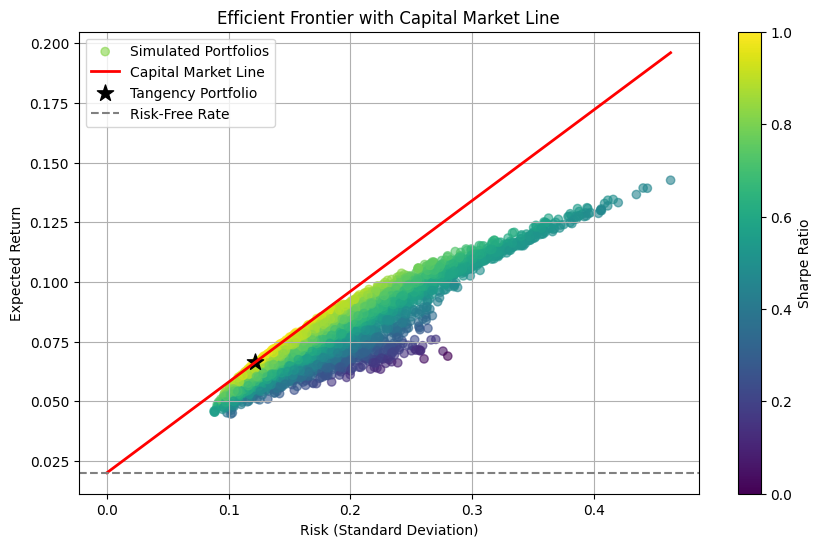

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Expected returns and volatilities
mu = np.array([0.08, 0.04, 0.05, 0.15, 0.07])
std_devs = np.array([0.20, 0.10, 0.15, 0.50, 0.30])

# Realistic correlation matrix
correlations = np.array([
    [1.00, 0.50, 0.15, 0.25, 0.50],
    [0.50, 1.00, 0.10, 0.10, 0.30],
    [0.15, 0.10, 1.00, 0.20, 0.10],
    [0.25, 0.10, 0.20, 1.00, 0.30],
    [0.50, 0.30, 0.10, 0.30, 1.00]
])

# Covariance matrix
cov = correlations * np.outer(std_devs, std_devs)

# Risk-free rate
rf = 0.02

# Simulate portfolios
num_portfolios = 5000
results = np.zeros((3, num_portfolios))  # return, risk, Sharpe
weights_list = []

for i in range(num_portfolios):
    weights = np.random.dirichlet(np.ones(len(mu)))
    weights_list.append(weights)

    port_return = np.dot(weights, mu)
    port_risk = np.sqrt(np.dot(weights.T, np.dot(cov, weights)))
    sharpe = (port_return - rf) / port_risk

    results[0, i] = port_return
    results[1, i] = port_risk
    results[2, i] = sharpe

# Identify the tangency portfolio (maximum Sharpe Ratio)
max_sharpe_idx = np.argmax(results[2])
tangency_return = results[0, max_sharpe_idx]
tangency_risk = results[1, max_sharpe_idx]

# Capital Market Line (line from rf to tangency portfolio)
cml_x = np.linspace(0, max(results[1]), 100)
cml_y = rf + ((tangency_return - rf) / tangency_risk) * cml_x

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(results[1], results[0], c=results[2], cmap='viridis', alpha=0.6, label='Simulated Portfolios')
plt.plot(cml_x, cml_y, color='red', linewidth=2, label='Capital Market Line')
plt.scatter(tangency_risk, tangency_return, color='black', marker='*', s=150, label='Tangency Portfolio')
plt.axhline(y=rf, color='gray', linestyle='--', label='Risk-Free Rate')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier with Capital Market Line')
plt.legend()
plt.grid(True)
plt.show()

## When Reality Meets Modern Portfolio Theory

Modern Portfolio Theory implies that all investors would ultimately allocate part of their wealth into the **same** optimal risky portfolio — the tangency portfolio — and then combine it with the risk-free asset according to their individual risk preferences.

But in practice, this is **not what we observe**. So where is the gap between theory and reality?

1. Estimation uncertainty
To construct the tangency portfolio, we need to know the **true expected returns** $ \mu $ and the **true covariance matrix** $ \Sigma $ of all risky assets. In reality, these parameters are **unknown** and must be estimated from historical data — which introduces sampling error and model risk.
(Also, note that we “cheated” in our example by treating broad indices as individual assets.)

2. Oversimplified investor preferences
MPT assumes that investor preferences are fully described by **mean and variance** — which implies normally distributed returns or quadratic utility. But in reality, investors often care about higher-order moments like skewness and maximum drawdown. For example, two portfolios with the same expected return and volatility may differ drastically in their **tail risk** — and most investors would not be indifferent between them.

3. Investment horizon heterogeneity
Not all investors have the same **investment horizon**. Some may invest for weeks, others for decades. This affects how returns and risks are estimated — short-term volatilities and correlations can be very different from long-term ones. Thus, the optimal portfolio may differ based on time horizon alone.

### Practical Adaptations and Extensions of Modern Portfolio Theory

To address the theoretical shortcomings of Modern Portfolio Theory in real-world applications, both practitioners and researchers have developed several refinements and alternative approaches:

#### 1. Robust Portfolio Optimization

Traditional optimization is very sensitive to estimation errors in $ \mu $ and $ \Sigma $. Even small inaccuracies can lead to extreme and unstable weight allocations.

**Robust optimization** techniques explicitly account for **uncertainty in inputs**, e.g., by:

- Using **confidence intervals** or **uncertainty sets** around estimates  
- Penalizing portfolios that are overly sensitive to changes in inputs  
- Seeking allocations that perform well across a range of possible scenarios  

These methods often lead to **more stable and diversified portfolios**, even if they slightly sacrifice optimality in-sample.

#### 2. Resampling and Shrinkage Estimators

To reduce estimation noise, especially in $ \mu $, many portfolio managers use:

- **Shrinkage estimators** (e.g., Ledoit-Wolf) that blend the empirical covariance matrix with a structured target (like the identity matrix)  
- **Resampling** techniques that create many bootstrapped versions of the input data to generate more robust portfolio weights  

The idea is to replace "precise but noisy" estimates with "less precise but more stable" ones — improving **out-of-sample performance**.

#### 3. Black-Litterman Model

The **Black-Litterman model** addresses the unrealistic input assumptions of MPT by:

- Starting with an **equilibrium market portfolio** (e.g., market cap weights)  
- Allowing investors to express **subjective views** on expected returns  
- Combining both in a **Bayesian framework**  

This results in more intuitive and stable portfolio weights and has become popular in institutional asset management.

#### 4. Factor Models and Risk Premia Investing

Rather than modeling asset returns individually, **factor models** (like Fama-French or APT) explain returns through exposure to **systematic risk factors** (e.g., value, momentum, size, quality).

This approach allows investors to:

- Target specific **risk premia**  
- Reduce dimensionality in estimating $ \mu $ and $ \Sigma $  
- Construct portfolios that align with macroeconomic exposures or behavioral patterns  

#### 5. Behavioral Finance and Real-World Preferences

Finally, **behavioral finance** acknowledges that real investors:

- Are not always rational  
- May care more about **losses than gains** (loss aversion)  
- Prefer **drawdown control** over standard deviation  
- May react emotionally to volatility and news  

This has inspired models that incorporate **nonlinear utility**, **drawdown constraints**, or **downside risk measures** (e.g., Conditional Value-at-Risk).

#### Summary

Modern Portfolio Theory provides a powerful framework, but **practical investing goes beyond the textbook version**. Real-world challenges like estimation error, non-normal distributions, behavioral preferences, and horizon heterogeneity demand **more flexible, robust, and psychologically informed tools** — and that’s exactly where modern finance research and practice continue to evolve.

## Parameter Uncertainty and Portfolio Optimization

To demonstrate the pitfalls of parameter uncertainty for portfolio optimiztion, we use a simulation example. The input values, i.e., expected returns and covariances are as before in this chapter. We simulate the data from a multivariate normal distribution. 

One of the simplest portfolio optimization problems is to find the portfolio with minimum variance, the **minimum variance portfolio**. Formally, we want to solve:

$$
\min_w \quad w^\top \Sigma w \
\text{s.t.} \quad \mathbf{1}^\top w = 1
$$

This is a quadratic program with a linear equality constraint. The closed-form solution for the unconstrained minimum variance portfolio is:

$$
w_{\text{mvp}} = \frac{\Sigma^{-1} \mathbf{1}}{\mathbf{1}^\top \Sigma^{-1} \mathbf{1}}
$$

Where:
	•	$ \Sigma^{-1} $ is the inverse of the covariance matrix
	•	$ \mathbf{1} $ is a vector of ones

With our input parameters from before:

$$
\mu =
\begin{bmatrix}
0.08 \\
0.04 \\
0.05 \\
0.15 \\
0.07
\end{bmatrix}
$$

and

$$
\Sigma =
\begin{bmatrix}
0.0400 & 0.0100 & 0.0060 & 0.0250 & 0.0300 \\
0.0100 & 0.0100 & 0.0015 & 0.0050 & 0.0090 \\
0.0060 & 0.0015 & 0.0225 & 0.0150 & 0.0045 \\
0.0250 & 0.0050 & 0.0150 & 0.2500 & 0.0450 \\
0.0300 & 0.0090 & 0.0045 & 0.0450 & 0.0900
\end{bmatrix}
$$


The optimal weights can be calculated with the formula from above and are:

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Step 1: True parameters (as before)
std_devs = np.array([0.20, 0.10, 0.15, 0.50, 0.30])
std_devs_monthly = std_devs / np.sqrt(12)

correlations = np.array([
    [1.00, 0.50, 0.15, 0.25, 0.50],
    [0.50, 1.00, 0.10, 0.10, 0.30],
    [0.15, 0.10, 1.00, 0.20, 0.10],
    [0.25, 0.10, 0.20, 1.00, 0.30],
    [0.50, 0.30, 0.10, 0.30, 1.00]
])

cov_true = correlations * np.outer(std_devs_monthly, std_devs_monthly)
ones = np.ones(len(std_devs))
inv_cov_true = np.linalg.inv(cov_true)
w_true = inv_cov_true @ ones / (ones.T @ inv_cov_true @ ones)
assets = ["Equity", "Corp Bond", "Gold", "Bitcoin", "Oil"]

for asset, weight in zip(assets, w_true):
    print(f"Weight for {asset}: {weight:.4f}")

Weight for Equity: -0.0338
Weight for Corp Bond: 0.7364
Weight for Gold: 0.2906
Weight for Bitcoin: 0.0001
Weight for Oil: 0.0066


Next, we simulate monthly returns for a period of 60 months (approximately five years) and estimate the covariance matrix with the empirical variance and covariance estimators. This estimated covariance matrix is used to determine optimal portfolio weights. We repeat this process for 1,000 times and plot the boxplots of corresponding weights over all simulation runs. You should notice that derived weights using empirical estimates usually do not match the actual optimal weights and sometimes are far off. 

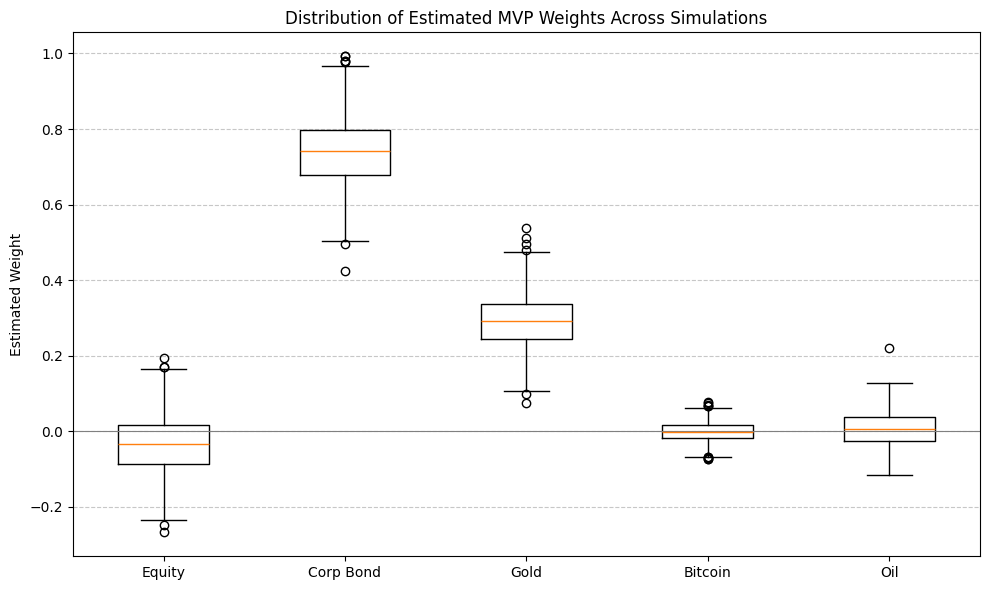

In [5]:
T = 60  # e.g., 60 months
mean_returns = np.array([0.08, 0.04, 0.05, 0.15, 0.07]) / 12 # not used for MVP, but realistic

simulation_runs = 1000
W_est = np.zeros((simulation_runs, len(std_devs)))

for sim in range(simulation_runs):
    simulated_returns = np.random.multivariate_normal(mean_returns, cov_true, size=T)
    cov_est = np.cov(simulated_returns, rowvar=False)
    inv_cov_est = np.linalg.inv(cov_est)
    w_est = inv_cov_est @ ones / (ones.T @ inv_cov_est @ ones)
    W_est[sim, :] = w_est

# calculate portfolio variance with estimated weights and true covariance matrix
portfolio_variances = np.array([
    w @ cov_true @ w.T for w in W_est
])


# 1. Boxplot of estimated weights
plt.figure(figsize=(10, 6))
plt.boxplot(W_est, tick_labels=assets)
plt.axhline(0, color='gray', linewidth=0.8)
plt.ylabel("Estimated Weight")
plt.title("Distribution of Estimated MVP Weights Across Simulations")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

To illustrate the economic consequence, we calculate the portfolio variance after each simulation run by replacing the true optimal weights with the estimate optimal weights:

$$
\hat{w}^\top \Sigma \hat{w}
$$

The histogram below shows the distribution of resulting variances over all simulation runs. The adverse consequence when our optimal portfolio weights rely on empirical estimates is that risk (measures by variance) is always higher than it should be.

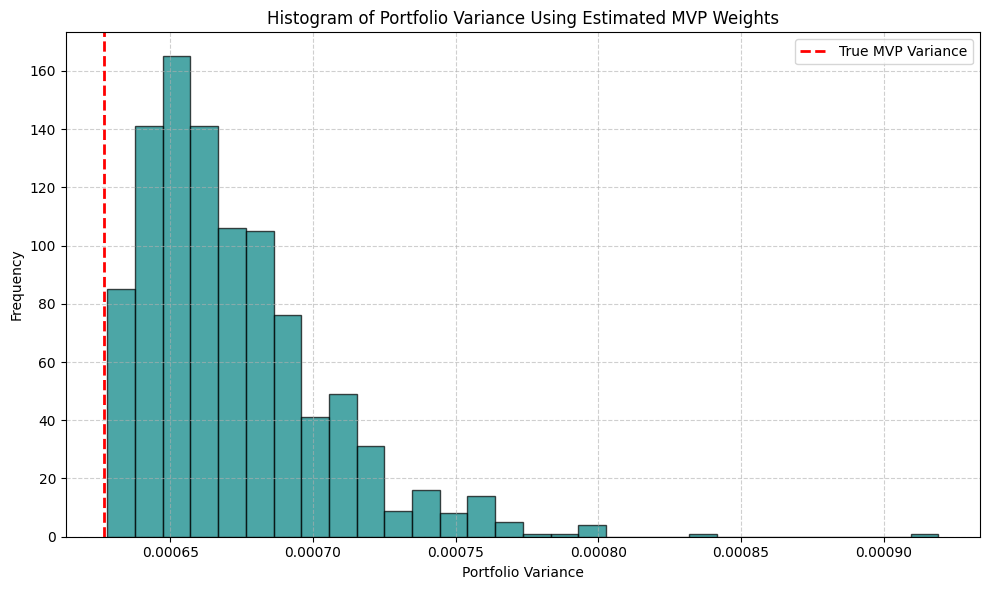

In [6]:
plt.figure(figsize=(10, 6))
plt.hist(portfolio_variances, bins=30, color='teal', edgecolor='black', alpha=0.7)
plt.axvline(w_true @ cov_true @ w_true.T, color='red', linestyle='--', linewidth=2, label='True MVP Variance')
plt.xlabel("Portfolio Variance")
plt.ylabel("Frequency")
plt.title("Histogram of Portfolio Variance Using Estimated MVP Weights")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Shrinkage Estimation 

The last simulation demonstrates that the estimation of the covariance matrix accurately is far from trivial. Especially, when the number of assets is large relative to the number of observations — a situation often encountered in finance — the **sample covariance matrix** becomes an unreliable estimator:

- It is **noisy** and highly sensitive to outliers.
- It may be **ill-conditioned** or even **not invertible**, especially when assets are highly correlated or the sample size is small.
- Its **eigenvalues** can be severely distorted, leading to instability in portfolio optimization and risk assessments.

These challenges motivate the use of **regularization techniques**, such as **shrinkage**, which aim to improve estimation by combining the noisy sample covariance matrix with a more stable structured matrix. This results in a covariance estimate that is both **more robust** and **guaranteed to be positive definite** — a key requirement for many financial models.

One of the most widely used approaches in this category is the **Ledoit-Wolf shrinkage estimator**.

The **Ledoit-Wolf shrinkage estimator** improves the estimation of the covariance matrix $\Sigma$ by combining the sample covariance matrix $\hat{\Sigma}$ with a structured and well-conditioned **target matrix** $F$. The most common choice for $F$ is a **scaled identity matrix**, which assumes all assets have the same variance and are uncorrelated.

The shrinkage estimator is defined as:

$$
\hat{\Sigma}_{\text{LW}} = \delta F + (1 - \delta) \hat{\Sigma}
$$

Where:
- $S$ is the sample covariance matrix
- $F$ is the shrinkage **target matrix** (typically $F = \bar{\sigma}^2 I$)
- $\delta \in [0, 1]$ is the **shrinkage intensity**, chosen to minimize mean squared error (MSE)

The target matrix $F$ is often defined as:

$$
F = \bar{\sigma}^2 I, \quad \text{with} \quad \bar{\sigma}^2 = \frac{1}{n} \operatorname{tr}(\hat{\Sigma})
$$

Where:
- $I$ is the $n \times n$ identity matrix
- $\operatorname{tr}(\hat{\Sigma})$ is the **trace** of the sample covariance matrix (i.e., the sum of its diagonal elements)
- $\bar{\sigma}^2$ is the **average variance** across all assets

The optimal shrinkage intensity $\delta$ is derived analytically to minimize the expected Frobenius norm of the difference between the estimator and the true covariance matrix:

$$
\delta^* = \arg \min_{\delta \in [0,1]} \mathbb{E} \left[ \| \hat{\Sigma}_{\text{LW}} - \Sigma \|_F^2 \right]
$$

This results in an estimator that:
- Is **always positive definite**
- Improves **conditioning** and **stability**
- Often leads to better **out-of-sample performance** in portfolio optimization

## Portfolio Optimization in Action

Towards the end of this chapter, we take a look at the practical application of portfolio optimizaton and its challenges. We are going to use a rolling window approach. At each point in time, we use an estimation window of the past to estimate optimal portfolio allocations and use them to hold a portfolio for a holding period. In our example, we use a small asset universe of Exchange Traded Funds (ETF) and Bitcoin, in detail, we have Bitcoin and an ETF which tracks the development of:

* the S\&P 500
* the STOXX 600
* Short term US Treasury Bonds
* Long term US Treasury Bonds
* Gold 
* Silver

The data starts in 2015. We use an estimation window of the past five years to estimate optimal portfolio weights, we hold the portfolio for one month. After that month, we estimate new optimal portfolio weights with the past five years, reallocate the portfolio weights accordingly and hold the portfolio for one month. This continues until the end of the time period. 

We use monthly returns to estimate the $\hat{\mu}$ and $\hat{\Sigma}$ because this fits to the time perspective of monthly updating. The portfolio performanc is evaluated by daily returns of the full holding period which starts in 2020. 

The mean vector $\hat{\mu}$ is estimated by the historical estimate. For $\hat{\Sigma}$, we compare the empirical and the Ledoit-Wolf estimates. A benchmark is the naive portfolio which holds equal weights for every asset.

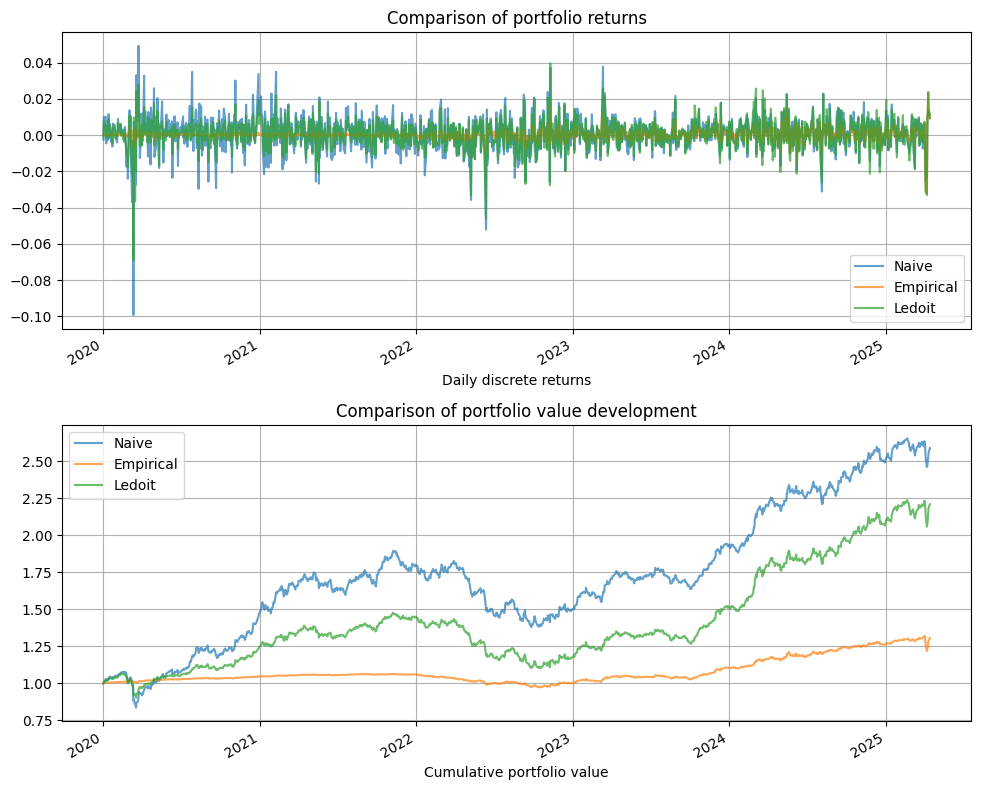

In [7]:
import yfinance as yf
import pandas as pd
import riskfolio as rp

try:
    assets = pd.read_csv("../data/chapter_07/pf_data.csv")
    assets["Date"] = pd.to_datetime(assets["Date"])
    assets.set_index("Date", inplace=True)
except:
    tickers = ["IUSE.L", "EXSA.DE", "SHY", "IEF", "BTC-USD", "GLD", "SLV"]
    asset_names = ["S&P_ETF", "STOXX_ETF", "Treasury_short", "Treasury_long", "Bitcoin", "Gold", "Silver"]
    assets = yf.download(tickers, start = "2015-01-01")
    assets = assets.loc[:, "Close"].dropna()
    assets.columns = asset_names
    assets = assets.loc[:, asset_names]
    assets.to_csv("../data/chapter_07/pf_data.csv")

assets = assets.pct_change().dropna()

window_years = 5
freq = 'MS'  
start_date = assets.index[0] + pd.DateOffset(years=window_years)
monthly_dates = assets.loc[start_date:, :].resample(freq).first().index

optimization_results_hist = {}
optimization_results_ledoit = {}
naive_pf_returns = {}
for current_date in monthly_dates:
    window_start = current_date - pd.DateOffset(years = window_years)
    evaluation_end = current_date + pd.DateOffset(months = 1)
    estimation_data = assets.loc[window_start:current_date, :]
    evaluation_data = assets.loc[current_date:evaluation_end, :]
    Y = (1 + estimation_data).resample("ME").prod() - 1
    port_hist = rp.Portfolio(returns = Y)
    port_hist.assets_stats(method_mu="hist", method_cov="hist")
    w_hist = port_hist.optimization(model = "Classic", rm = "MV", rf = 0.0, obj = "Sharpe", hist = True)

    port_ledoit = rp.Portfolio(returns = Y)
    port_ledoit.assets_stats(method_mu="hist", method_cov="ledoit")
    w_ledoit = port_ledoit.optimization(model = "Classic", rm = "MV", rf = 0.0, obj = "Sharpe", hist = True)
    
    naive_pf_returns[current_date] = evaluation_data.mean(axis = 1)
    optimization_results_hist[current_date] = {}
    optimization_results_hist[current_date]["weights"] = w_hist
    optimization_results_hist[current_date]["pf_returns"] =  pd.Series(evaluation_data.values.dot(w_hist.values).flatten(), index = evaluation_data.index)
    
    optimization_results_ledoit[current_date] = {}
    optimization_results_ledoit[current_date]["weights"] = w_ledoit
    optimization_results_ledoit[current_date]["pf_returns"] =  pd.Series(evaluation_data.values.dot(w_ledoit.values).flatten(), index = evaluation_data.index)

optimal_weights_hist = pd.concat(
    [result['weights'] for result in optimization_results_hist.values()],
    axis=1
)
optimal_weights_hist.columns = optimization_results_hist.keys()
optimal_weights_hist = optimal_weights_hist.transpose()

optimal_weights_ledoit = pd.concat(
    [result['weights'] for result in optimization_results_ledoit.values()],
    axis=1
)
optimal_weights_ledoit.columns = optimization_results_ledoit.keys()
optimal_weights_ledoit = optimal_weights_ledoit.transpose()

pf_returns_naive = pd.concat([
    result for result in naive_pf_returns.values()
], axis = 0).drop_duplicates()

pf_returns_hist = pd.concat(
    [result['pf_returns'] for result in optimization_results_hist.values()],
    axis=0
).drop_duplicates()

pf_returns_ledoit = pd.concat(
    [result['pf_returns'] for result in optimization_results_ledoit.values()],
    axis=0
).drop_duplicates()

pf_returns = pd.concat((pf_returns_naive, pf_returns_hist, pf_returns_ledoit), axis = 1)
pf_returns.columns = ["Naive", "Empirical", "Ledoit"]

fig, axs = plt.subplots(2, 1, figsize = (10,8))
pf_returns.plot(alpha = 0.7, ax = axs[0])
(1 + pf_returns).cumprod().plot(alpha = 0.7, ax = axs[1])
axs[0].grid()
axs[0].set_xlabel("Daily discrete returns")
axs[0].set_title("Comparison of portfolio returns")
axs[1].grid()
axs[1].set_xlabel("Cumulative portfolio value")
axs[1].set_title("Comparison of portfolio value development")

fig.tight_layout()

The figure above shows the daily returns and cumulative value development (assuming an initial investment of one monetary unit) of the three portfolios during the holdout period. It becomes apparent that the portfolio relying solely on empirical (sample-based) covariance estimates exhibits unusually low variation and delivers the lowest overall performance.

This behavior can be explained by examining the portfolio weights over time, as shown in the figure below. The empirical covariance approach predominantly allocates its weight to the Gold ETF. Gold is widely regarded as a "safe haven" asset due to its low volatility, but it typically offers lower expected returns compared to riskier assets. The optimizer, prioritizing risk minimization under noisy covariance estimates, favors gold as a relatively stable choice.

In contrast, the portfolio constructed using the **Ledoit-Wolf shrinkage estimator** shows a more diversified and dynamic allocation pattern. Although it differs from the naive (equally-weighted) strategy, it achieves greater dispersion of weights across assets. This illustrates how the shrinkage estimator regularizes the covariance matrix and enables more balanced portfolio construction.

It’s important to note that even when using an **unconditional estimator**, changing portfolio weights over time can reflect shifts in the estimated covariance matrix. These shifts may result not from true market dynamics, but from **estimation uncertainty** — that is, natural variation due to changes in the data sample over time.

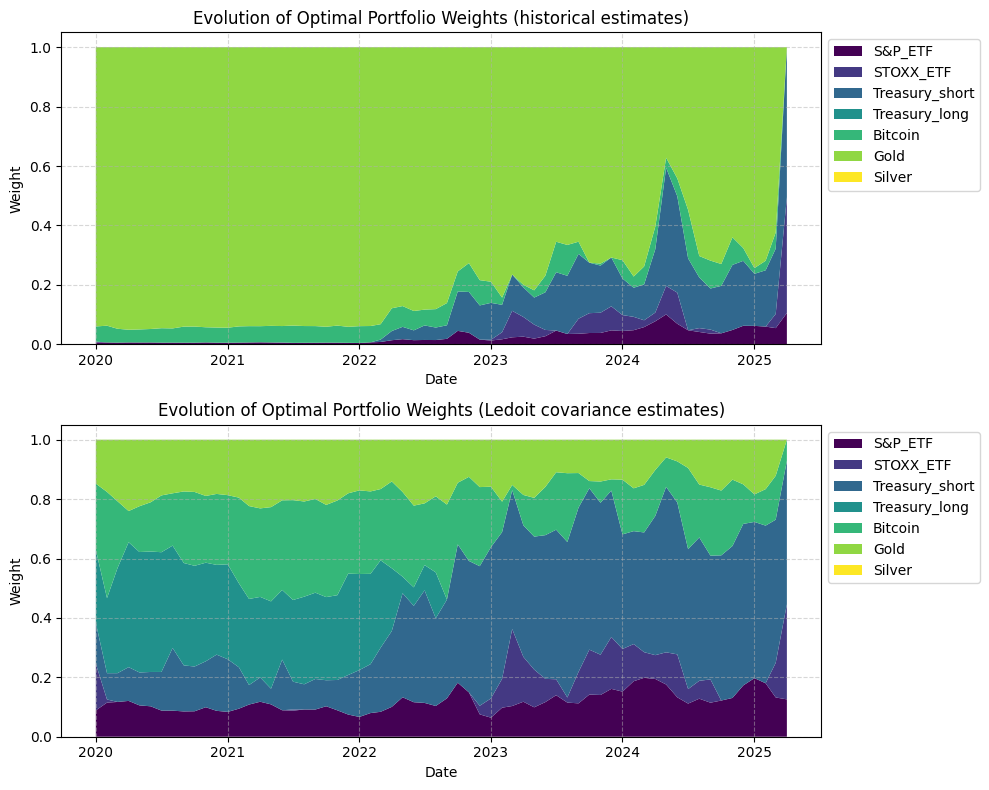

In [8]:
n_assets = optimal_weights_hist.shape[1]
viridis = plt.get_cmap("viridis")
colors = viridis(np.linspace(0, 1, n_assets))

fig, axs = plt.subplots(2, 1, figsize = (10, 8))

axs[0].stackplot(optimal_weights_hist.index, optimal_weights_hist.T, labels=optimal_weights_hist.columns, colors=colors)
axs[0].set_title("Evolution of Optimal Portfolio Weights (historical estimates)")
axs[0].set_xlabel("Date")
axs[0].set_ylabel("Weight")
axs[0].legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
axs[0].grid(True, linestyle='--', alpha=0.5)

axs[1].stackplot(optimal_weights_ledoit.index, optimal_weights_ledoit.T, labels=optimal_weights_ledoit.columns, colors=colors)
axs[1].set_title("Evolution of Optimal Portfolio Weights (Ledoit covariance estimates)")
axs[1].set_xlabel("Date")
axs[1].set_ylabel("Weight")
axs[1].legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
axs[1].grid(True, linestyle='--', alpha=0.5)

fig.tight_layout()
plt.show()

Besides the graphical interpretation, we can take a look at the descriptive statistics below:

In [9]:
from utils import describe_with_moments

pf_returns_descriptive = describe_with_moments(pf_returns)
pf_returns_descriptive

,Naive,Empirical,Ledoit
count,1330.000000,1330.000000,1330.000000
mean,0.000760,0.000204,0.000625
std,0.009343,0.002845,0.007591
min,-0.099224,-0.032663,-0.068908
5%,-0.012946,-0.003339,-0.011471
50%,0.000729,0.000187,0.000853
95%,0.014094,0.004320,0.011714
max,0.049208,0.023683,0.039504
skew,-0.997256,-1.405057,-0.818058
kurtosis,11.961964,30.877844,7.820229


We can confirm that the volatility is higher for the naive and Ledoit-Wolf portfolio but also results in higher average returns. To evaluate the risk-profit relation, we may take a look at the ratio of average returns to the volatility. This is an empirical estimate of a pseudo Sharpo ratio ($SR^{*}$) which ignores the risk free rate:

$$
SR^{*} = \frac{\hat{\mu}_p}{\hat{\sigma}p}
$$

If you take a look in the cell below, we observe that the Ledoit-Wolf approach delivers the highest ratio which indicates that it has the best reward to risk ratio. Notably, it is followed by a naive portfolio weighting and not by the optimized portfolio which uses empirical estimates. This again highlights the challenges of portfolio optimization with respect to estimation uncertainty. Furthermore, the results presented ignore transaction costs which are almost zero for the naive portfolio, but, higher for the optimization approaches with monthly rebalancing. 

In [10]:
pf_returns_descriptive.loc["mean"] / pf_returns_descriptive.loc["std"]

Naive        0.081314
Empirical    0.071593
Ledoit       0.082390
dtype: float64

## Summary

In this chapter, we introduced the fundamental principles of portfolio optimization within the framework of modern portfolio theory. We explored how the covariance matrix of asset returns plays a central role in determining optimal allocations, and how different estimation techniques — such as the historical sample estimator and the Ledoit-Wolf shrinkage estimator — impact portfolio construction.

Through rolling-window backtests, we saw that estimation uncertainty can lead to very different portfolio outcomes, especially when sample sizes are limited or market conditions change. Shrinkage methods provide a practical solution by regularizing the covariance matrix, improving stability and out-of-sample performance.

While we focused on classical techniques and monthly data, there is a wide range of extensions worth exploring. These include using **daily returns** for more granular estimation, implementing **time-varying covariance models** (e.g., exponentially weighted or GARCH-based estimators), incorporating **alternative risk measures** like Value-at-Risk (VaR) or Conditional Value-at-Risk (CVaR), or even using **machine learning methods** for dynamic portfolio allocation.

Ultimately, portfolio optimization remains a powerful yet complex tool. Its effectiveness depends heavily on the quality and stability of input parameters, making thoughtful estimation techniques and robust modeling choices essential for practical success.